<a href="https://colab.research.google.com/github/aylinazlina/-Application-of-CNN-Model-to-recognize-Handwritten-Bangla-Character/blob/main/Bangla_HandWrittenDataset_Basic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip the dataset
import zipfile

In [3]:
zip_path = '/content/drive/MyDrive/BasicFinal_BanglaHandwriteenDataset/archive.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/bangla_dataset')

In [9]:
import os

base_path = '/content/bangla_dataset'

# List top-level folders/files
for item in os.listdir(base_path):
    print(item)


BasicFinalDatabase
basicfinal


In [10]:
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:3]:  # only show first 3 files per folder to avoid long output
        print(f"{subindent}{f}")


bangla_dataset/
    BasicFinalDatabase/
        BasicFinalDatabase/
            Train/
                190/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                216/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                186/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                211/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                218/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                178/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                198/
                    bcc000214.bmp
                    bcc000173.bmp
                    bcc000195.bmp
                182/
                    bcc000214.b

In [14]:
import os

base_dir = '/content/bangla_dataset/basicfinal'

for item in os.listdir(base_dir):
    print(item)


basicfinal


In [15]:
import os

deeper_path = '/content/bangla_dataset/basicfinal/basicfinal'

for item in os.listdir(deeper_path):
    print(item)


Val
Train
Test


In [16]:
train_path = '/content/bangla_dataset/basicfinal/basicfinal/Train'
test_path = '/content/bangla_dataset/basicfinal/basicfinal/Test'
val_path = '/content/bangla_dataset/basicfinal/basicfinal/Val'


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 8400 images belonging to 50 classes.


In [19]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 3600 images belonging to 50 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important for confusion matrix and ROC curve
)

Found 3000 images belonging to 50 classes.


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
from itertools import cycle


In [22]:
num_classes = train_generator.num_classes

#CNN Model Architecture

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),   # Conv Layer 1
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pool 1

    Conv2D(64, (3, 3), activation='relu'),                            # Conv Layer 2
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pool 2

    Flatten(),                                                        # Flatten
    Dense(128, activation='relu'),                                    # Dense Layer
    Dropout(0.5),
    Dense(num_classes, activation='softmax')                          # Fully Connected Layer
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,631,602 (6.22 MB)

 Trainable params: 1,631,602 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

#Compile & Train

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 59s 214ms/step - accuracy: 0.1306 - loss: 3.4774 - val_accuracy: 0.6161 - val_loss: 1.5185
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 54s 206ms/step - accuracy: 0.5125 - loss: 1.7126 - val_accuracy: 0.7328 - val_loss: 0.9958
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.6720 - loss: 1.1315 - val_accuracy: 0.7708 - val_loss: 0.8124
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.7476 - loss: 0.8446 - val_accuracy: 0.7961 - val_loss: 0.7168
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 61s 231ms/step - accuracy: 0.7980 - loss: 0.6470 - val_accuracy: 0.8033 - val_loss: 0.6529
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 59s 223ms/step - accuracy: 0.8248 - loss: 0.5387 - val_accuracy: 0.8086 - val_loss: 0.6607
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 60s 227ms/step - accuracy: 0.8527 - loss: 0.4659 - val_accuracy: 0.8153 - val_loss: 0.6518
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.8627 - loss: 0.4172 - val

#Plot Accuracy & Loss Curves

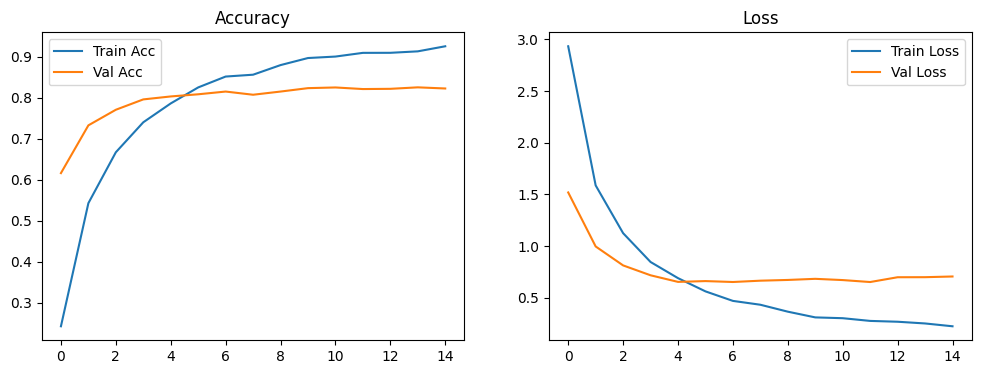

In [25]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


#Confusion Matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step


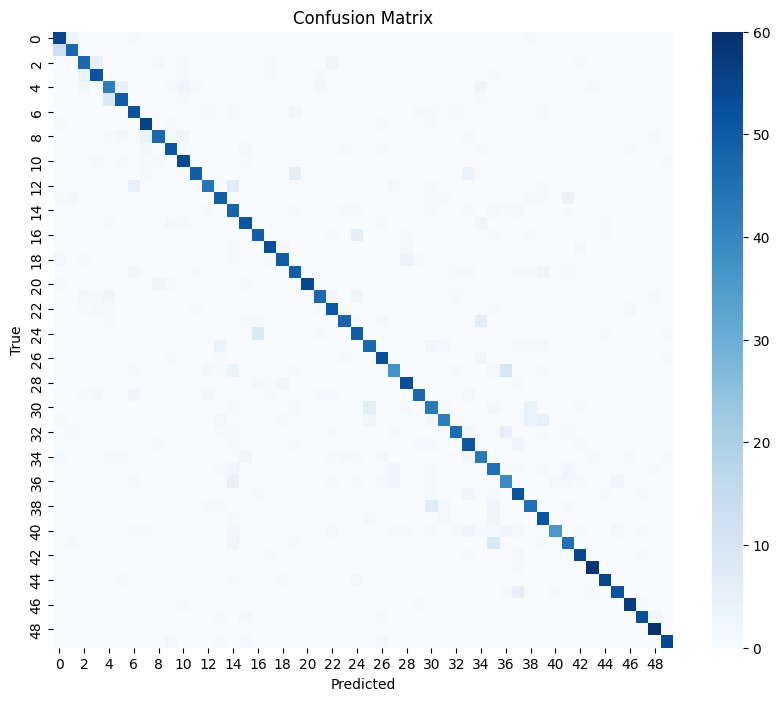

In [26]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#ROC Curve (One-vs-Rest)

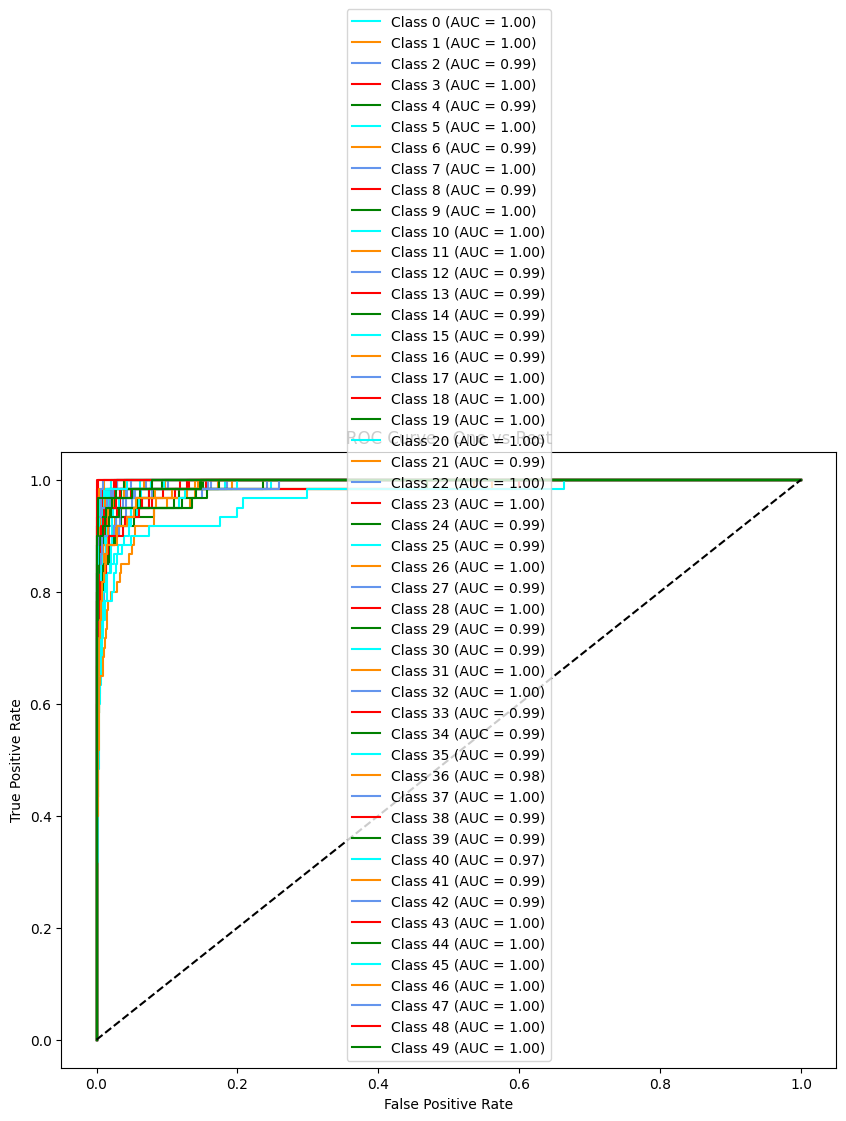

In [27]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=range(num_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One vs Rest')
plt.legend()
plt.show()


#Model Architecture Summary

In [28]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,894,808 (18.67 MB)

 Trainable params: 1,631,602 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,263,206 (12.45 MB)

In [35]:
!apt-get install -y graphviz
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


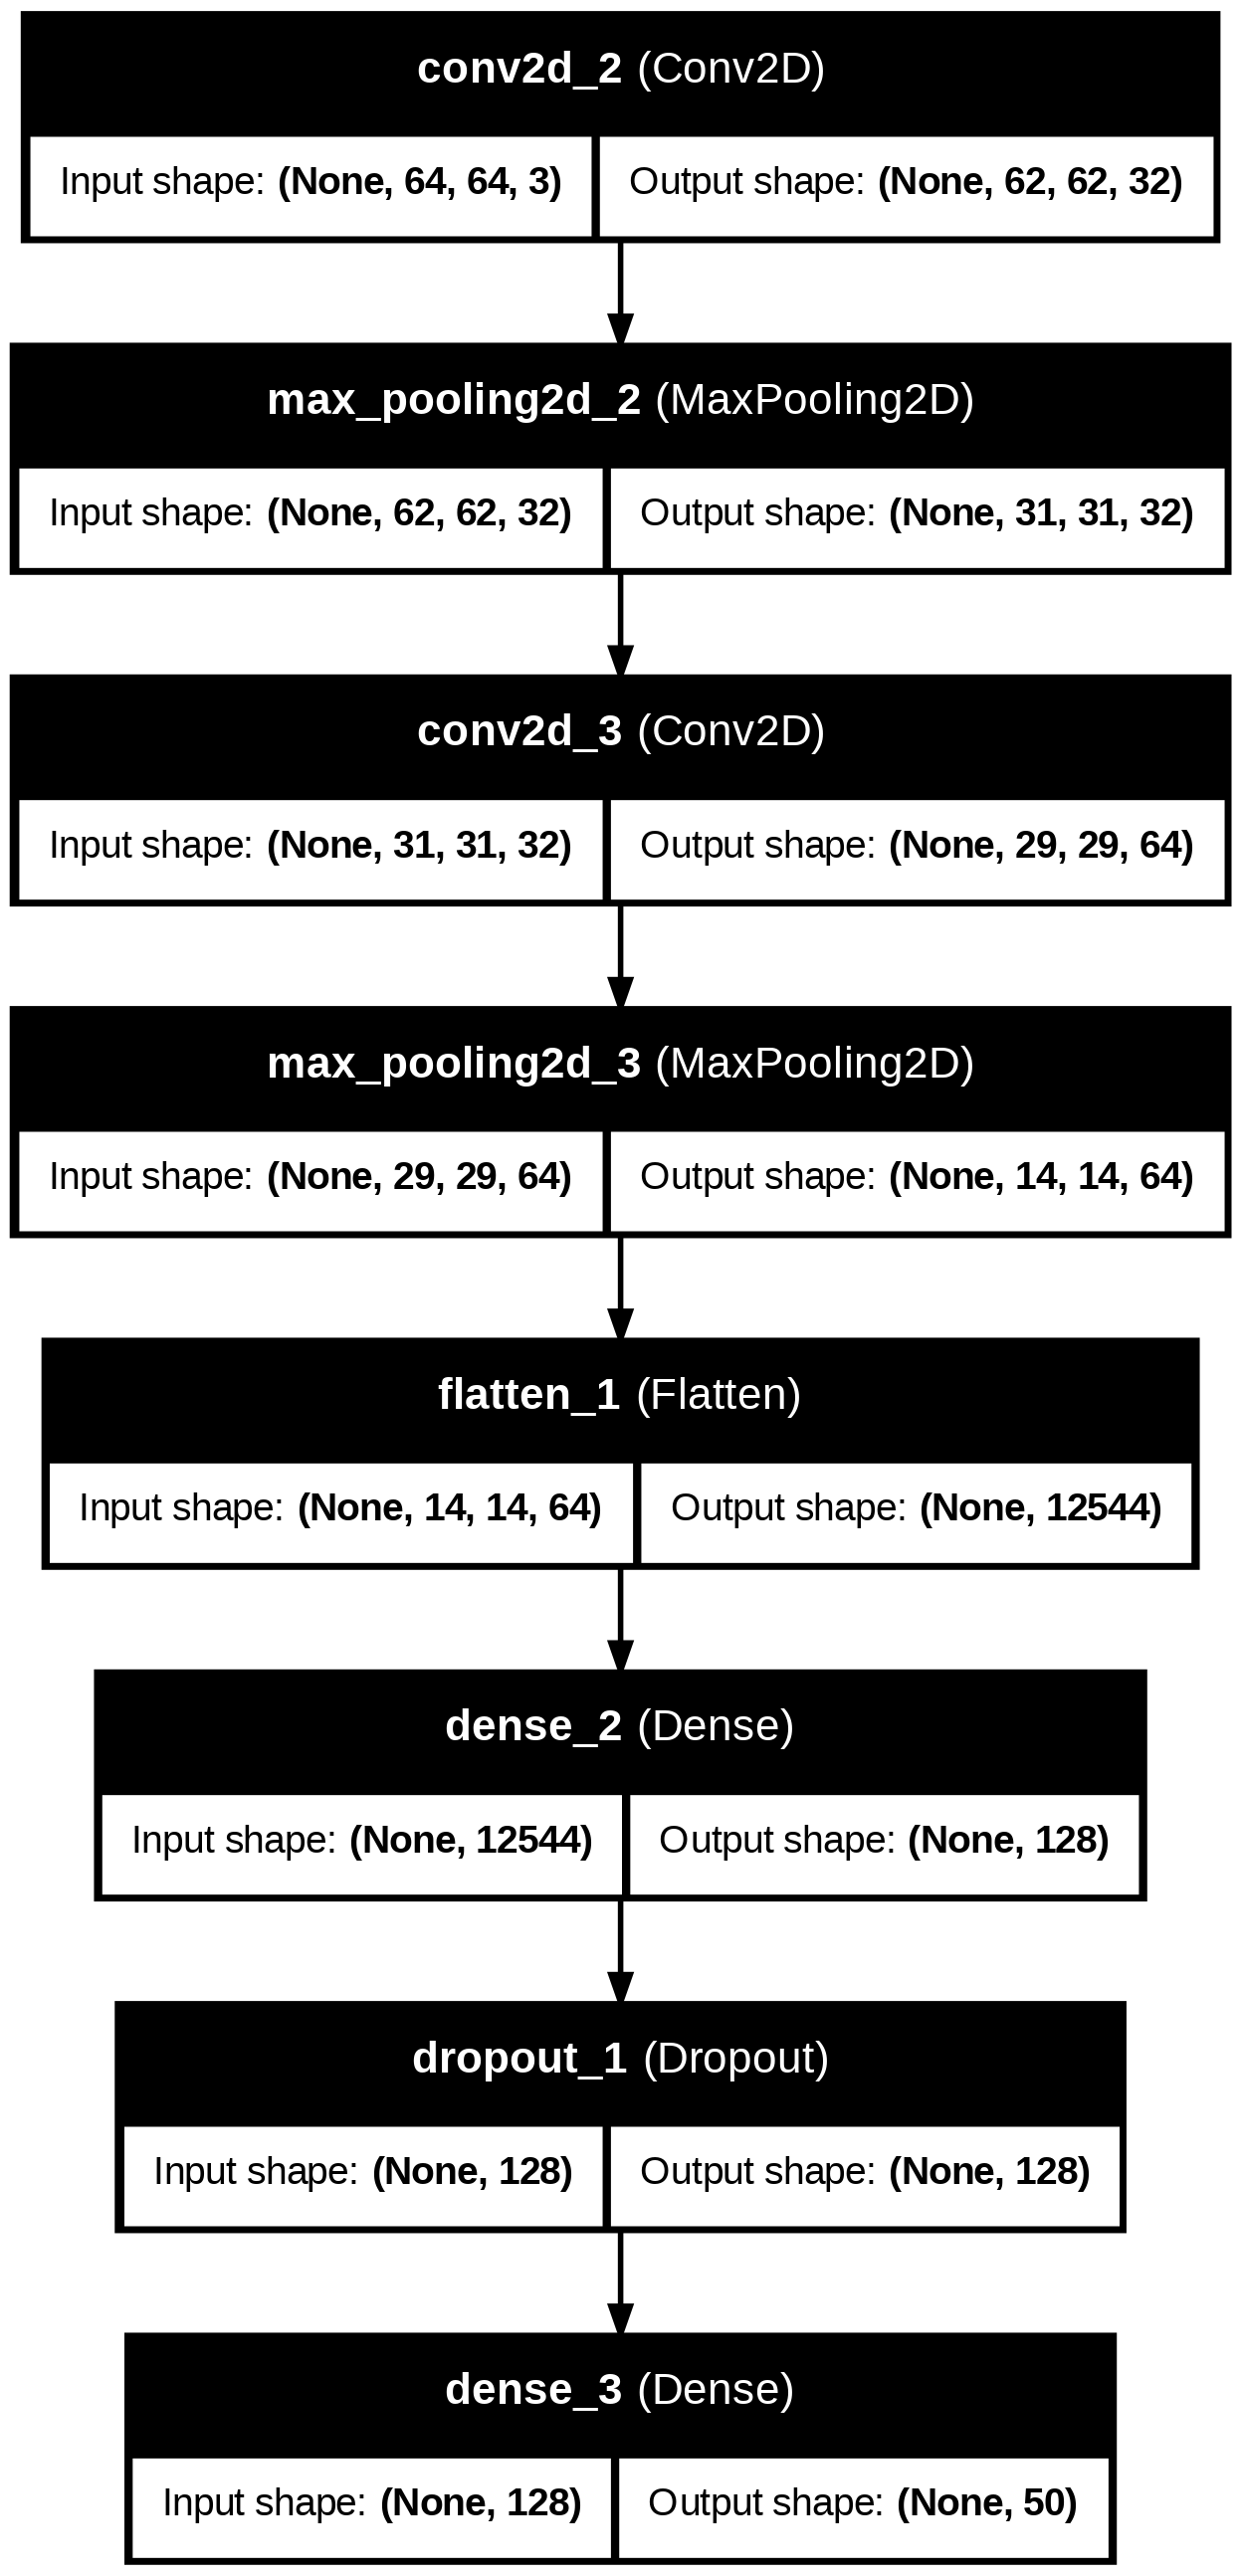

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

# Display the image in notebook
from IPython.display import Image
Image("model_architecture.png")


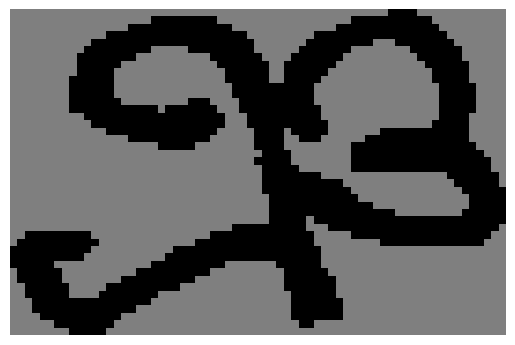

Image shape: (44, 67, 3)


In [39]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os

folder_path = '/content/bangla_dataset/basicfinal/basicfinal/Train/192'
file_name = os.listdir(folder_path)[0]  # Get first image in the folder
file_path = os.path.join(folder_path, file_name)

# Load and show image using Keras
img = image.load_img(file_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Load and show shape using OpenCV
img_cv2 = cv2.imread(file_path)
print("Image shape:", img_cv2.shape)
